In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc tập dữ liệu từ file CSV (giả định rằng bạn có file rice_dataset.csv)


In [16]:
# Đọc tập dữ liệu từ file CSV (giả định rằng bạn có file rice_dataset.csv)
# df = pd.read_csv('./standardized-rice.csv')

df = pd.read_excel('./Rice2024.xlsx', engine='openpyxl')
df = pd.DataFrame(df)

In [10]:
# Hiển thị vài dòng đầu tiên của tập dữ liệu
print(df.head())

   Class      Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0      0  0.675937   0.879232           0.901216           0.532417   
1      0  0.625330   0.714095           0.648087           0.670663   
2      0  0.623394   0.750066           0.734349           0.588124   
3      0  0.495071   0.524136           0.512800           0.581461   
4      0  0.628146   0.781992           0.709138           0.620288   

   Eccentricity  Convex_Area    Extent  
0      0.888011     0.693917  0.207577  
1      0.691980     0.646009  0.324564  
2      0.789846     0.635636  0.538576  
3      0.671227     0.496220  0.393954  
4      0.758067     0.662711  0.408680  


In [11]:
# Thống kê cơ bản về các cột số
print(df.describe())

             Class         Area    Perimeter  Major_Axis_Length  \
count  3802.000000  3802.000000  3802.000000        3802.000000   
mean      0.573119     0.450048     0.502124           0.463805   
std       0.494690     0.152404     0.187935           0.186012   
min       0.000000     0.000000     0.000000           0.000000   
25%       0.000000     0.335768     0.353717           0.310279   
50%       1.000000     0.428402     0.473942           0.431926   
75%       1.000000     0.562753     0.657798           0.621280   
max       1.000000     1.000000     1.000000           1.000000   

       Minor_Axis_Length  Eccentricity  Convex_Area       Extent  
count        3802.000000   3802.000000  3802.000000  3802.000000  
mean            0.557684      0.641891     0.459409     0.452268  
std             0.119385      0.121901     0.156154     0.212212  
min             0.000000      0.000000     0.000000     0.000000  
25%             0.483039      0.557095     0.342849     0.278

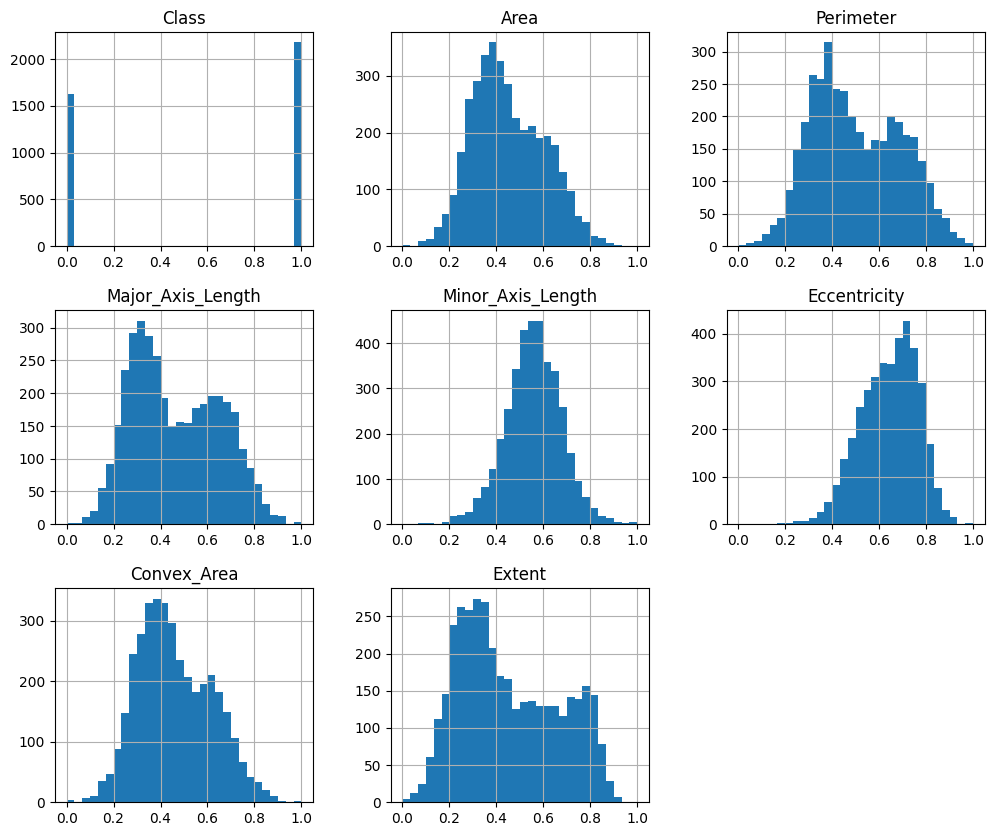

In [12]:
# Vẽ biểu đồ phân phối cho các thuộc tính số
df.hist(bins=30, figsize=(12, 10))
plt.show()

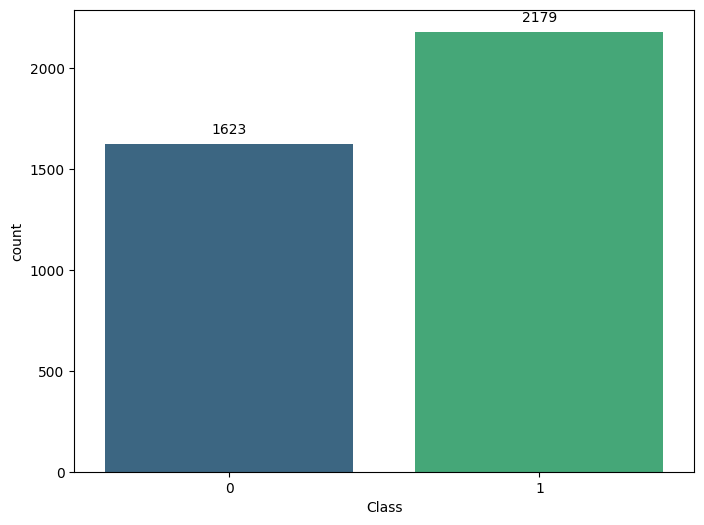

In [14]:
# Biểu đồ phân phối nhãn

plt.figure(figsize=(8, 6))
sns_plot = sns.countplot(x='Class', data=df,
                         hue='Class', palette='viridis', legend=False)

# Thêm số lượng lên trên mỗi cột
for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')

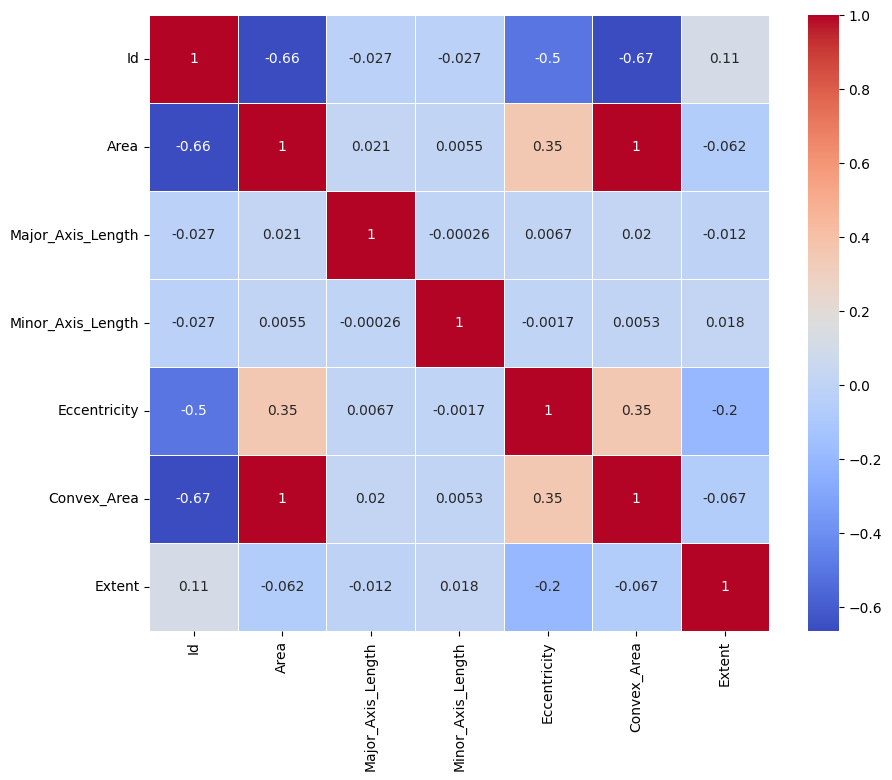

In [17]:
# Loại bỏ cột 'Class' hoặc bất kỳ cột nào không phải dạng số
numeric_df = df.select_dtypes(include=[np.number])
# Tính toán ma trận tương quan chỉ với các cột dạng số
corr_matrix = numeric_df.corr()
# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()